## 一、重要参数

### （一）控制基评估器的参数

criterion：不纯度的衡量指标，有基尼系数gini和信息熵entropy(信息增益)两种选择。<br>
max_depth：树的最大深度，超过最大深度的树枝都会被剪掉。<br>
min_samples_leaf：一个节点在分枝后的每个子节点都必须包含至少min_samples_leaf个训练样本，否则分枝就不会发生。<br>
min_samples_split：一个节点必须要包含至少min_samples_split个训练样本，这个节点才允许被分枝，否则分枝就不会发生。<br>
max_features：max_features限制分枝时考虑的特征个数，超过限制个数的特征都会被舍弃，默认值为总特征个数开平方取整。<br>
min_impurity_decrease：限制信息增益的大小，信息增益小于设定数值的分枝不会发生。

单个决策树的准确率越高，随机森林的准确率也会越高，因为袋装法是依赖于平均值或者少数服从多数原则来决定集成结果的。

### （二）n_estimators

森林中树木的数量，即基评估器的数量，默认100，对精确性的影响是单调的，n_estimators越大，模型的效果往往越好，但达到一定程度后，精确性往往不再上升或开始波动。因此，对于这个参数，需要在训练难度和模型效果之间取得平衡。

**1.导入需要的包**

In [1]:
%matplotlib inline
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt

**2.导入需要的数据集**

In [2]:
wine = load_wine()
wine #字典

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [3]:
wine.data.shape

(178, 13)

In [4]:
wine.target #三分类

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

**3.sklearn建模**

（1）实例化；<br>
（2）训练集代入实例化的模型进行训练，接口是fit；<br>
（3）使用其他接口将测试集导入训练好的模型获取希望获取的结果（score，Y_test）。<br>

In [5]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data, wine.target, test_size=0.3)

#实例化
clf = DecisionTreeClassifier(random_state=0) #决策树
rfc = RandomForestClassifier(random_state=0) #随机森林

#训练
clf = clf.fit(Xtrain, Ytrain)
rfc = rfc.fit(Xtrain, Ytrain)

#导入测试集
score_c = clf.score(Xtest, Ytest)
score_r = rfc.score(Xtest, Ytest)

print("Single Tree:{}".format(score_c)
     ,"Random Forest:{}".format(score_r))

Single Tree:0.8148148148148148 Random Forest:0.9814814814814815


**4.画出随机森林分类和决策分类树在一组交叉验证下的效果对比**

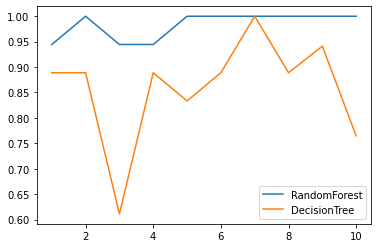

In [6]:
rfc = RandomForestClassifier(n_estimators=25) #25任意填写的
rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10)

clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf,wine.data,wine.target,cv=10)

plt.plot(range(1,11),rfc_s,label="RandomForest") #横轴是第几次交叉验证
plt.plot(range(1,11),clf_s,label="DecisionTree") #横轴是第几次交叉验证
plt.legend()

**5.画出随机森林分类和决策分类树在十组交叉验证下的效果对比**

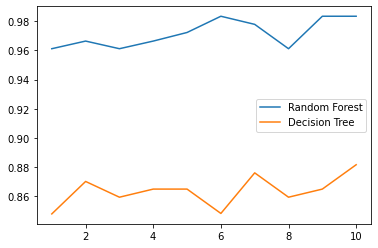

In [7]:
rfc_l = [] #存放随机森林分类结果
clf_l = [] #存放分类树结果

for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10).mean()
    rfc_l.append(rfc_s)
    
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf, wine.data, wine.target, cv=10).mean()
    clf_l.append(clf_s)
    
plt.plot(range(1,11),rfc_l,label = "Random Forest")
plt.plot(range(1,11),clf_l,label = "Decision Tree")
plt.legend()

**6.n_estimators的学习曲线**

0.9888888888888889 27


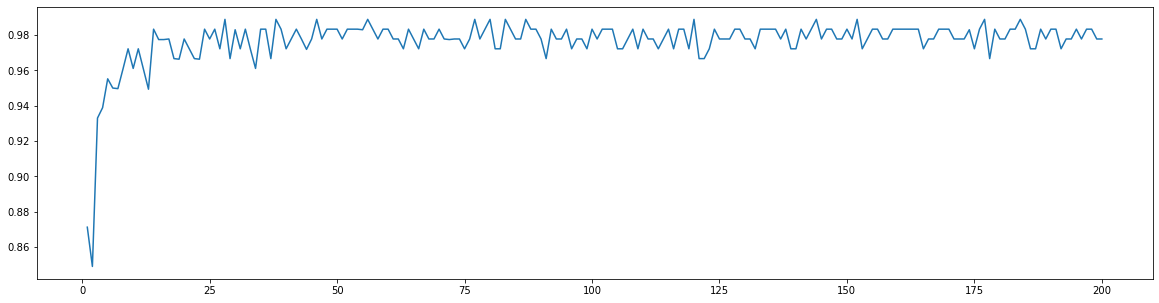

In [8]:
superpa = []
for i in range(200):
    rfc = RandomForestClassifier(n_estimators=i+1, n_jobs=-1) #n_jobs=-1表示使用整个处理器来运行
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    superpa.append(rfc_s)
print(max(superpa),superpa.index(max(superpa))) #返回最好的效果分数及其索引（也就是i，i+1就是最好的n_estimators）
plt.figure(figsize=[20,5])
plt.plot(range(1,201),superpa)

### （三）random_state，生成固定的森林

当random_state固定时，随机森林中生成的是一组固定的树。

In [9]:
rfc = RandomForestClassifier(n_estimators=25, random_state=2)
rfc = rfc.fit(Xtrain, Ytrain)

In [10]:
#查看森林树的状况
rfc.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=1872583848),
 DecisionTreeClassifier(max_features='auto', random_state=794921487),
 DecisionTreeClassifier(max_features='auto', random_state=111352301),
 DecisionTreeClassifier(max_features='auto', random_state=1853453896),
 DecisionTreeClassifier(max_features='auto', random_state=213298710),
 DecisionTreeClassifier(max_features='auto', random_state=1922988331),
 DecisionTreeClassifier(max_features='auto', random_state=1869695442),
 DecisionTreeClassifier(max_features='auto', random_state=2081981515),
 DecisionTreeClassifier(max_features='auto', random_state=1805465960),
 DecisionTreeClassifier(max_features='auto', random_state=1376693511),
 DecisionTreeClassifier(max_features='auto', random_state=1418777250),
 DecisionTreeClassifier(max_features='auto', random_state=663257521),
 DecisionTreeClassifier(max_features='auto', random_state=878959199),
 DecisionTreeClassifier(max_features='auto', random_state=854108747),
 DecisionTre

In [11]:
#查看某棵树0的random_state值
rfc.estimators_[0].random_state

1872583848

In [12]:
#获取所有树的random_state
for i in range(len(rfc.estimators_)):
    print(rfc.estimators_[i].random_state)

1872583848
794921487
111352301
1853453896
213298710
1922988331
1869695442
2081981515
1805465960
1376693511
1418777250
663257521
878959199
854108747
512264917
515183663
1287007039
2083814687
1146014426
570104212
520265852
1366773364
125164325
786090663
578016451


### （四）bootstrap & oob_score

要让基分类器尽量都不一样，一种方法是使用不同的训练集来进行训练，而袋装法正是通过有放回的随机抽样技术来形成不同的训练数据，bootstrap就是用来控制抽样技术的参数。bootstrap参数默认True，代表采用有放回的随机抽样技术。

由于是有放回，一些样本可能在同一个自助集中出现多次，而其他一些却可能被忽略，一般来说，自助机大约平均包含63%的原始数据（样本量n足够大），因此，会有37%的训练数据被浪费掉，没有参与建模，这些数据成为袋外数据（oob）。除了最开始就划分好的测试集之外，这些数据也可以被用来作为集成算法的测试集（oob_score=True）。

In [13]:
rfc = RandomForestClassifier(n_estimators=25,bootstrap=True,oob_score=True)
rfc = rfc.fit(wine.data,wine.target)

In [14]:
#重要属性oob_score_，查看使用袋外数据作为测试集的结果
rfc.oob_score_

0.9606741573033708

## 二、重要属性和接口

**属性**<br>
estimators_：查看树的状况；<br>
oob_score_：查看使用袋外数据作为测试集的结果；<br>
feature\_importances\_：特征的重要性。

**接口**（调用输入测试集后的结果）<br>
apply：输入测试集或样本点，返回每个样本被分到的叶节点的索引；<br>
fit：返回训练完毕的模型；<br>
predict：返回模型预测的测试样本的标签或回归值；<br>
score：返回在测试集上的精确度；<br>
predict_proba：返回测试集中每个样本点对应的每个标签的概率。<br>

In [15]:
rfc = RandomForestClassifier(n_estimators=25)
rfc = rfc.fit(Xtrain, Ytrain)

In [16]:
#score接口，返回测试结果
rfc.score(Xtest, Ytest)

0.9629629629629629

In [17]:
#返回所有特征的重要性，越大越重要，使用zip将特征和重要性连起来
rfc.feature_importances_

array([0.12050446, 0.02556473, 0.01948947, 0.02407569, 0.0249701 ,
       0.0514506 , 0.14709314, 0.01106034, 0.01024901, 0.13761948,
       0.0835539 , 0.12980275, 0.21456633])

In [18]:
#返回测试集中的每一个样本在每一棵树中叶子节点的索引
rfc.apply(Xtest)

array([[ 6,  4,  2, ..., 11,  6,  3],
       [13,  9,  7, ...,  5,  2,  9],
       [ 8, 10, 12, ..., 14, 12, 16],
       ...,
       [13, 10, 12, ..., 14, 12, 16],
       [ 6,  3,  6, ...,  8,  6,  3],
       [ 5,  9,  7, ...,  5,  2,  9]], dtype=int64)

In [19]:
#返回对测试集预测的结果
rfc.predict(Xtest)

array([1, 2, 0, 1, 0, 2, 2, 1, 0, 0, 0, 2, 2, 1, 1, 1, 0, 1, 0, 2, 1, 0,
       2, 1, 0, 2, 2, 0, 1, 0, 1, 0, 1, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 2, 2, 0, 0, 1, 0, 1, 2])

In [20]:
#返回每个样本对应的每一类标签的概率
rfc.predict_proba(Xtest)

array([[0.16, 0.84, 0.  ],
       [0.04, 0.04, 0.92],
       [0.88, 0.12, 0.  ],
       [0.  , 0.92, 0.08],
       [1.  , 0.  , 0.  ],
       [0.04, 0.4 , 0.56],
       [0.04, 0.28, 0.68],
       [0.  , 0.96, 0.04],
       [0.84, 0.16, 0.  ],
       [0.48, 0.4 , 0.12],
       [0.92, 0.04, 0.04],
       [0.  , 0.08, 0.92],
       [0.  , 0.24, 0.76],
       [0.28, 0.64, 0.08],
       [0.  , 1.  , 0.  ],
       [0.04, 0.96, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.04, 0.96, 0.  ],
       [0.92, 0.  , 0.08],
       [0.  , 0.12, 0.88],
       [0.08, 0.72, 0.2 ],
       [0.92, 0.08, 0.  ],
       [0.04, 0.  , 0.96],
       [0.08, 0.92, 0.  ],
       [0.96, 0.04, 0.  ],
       [0.  , 0.08, 0.92],
       [0.  , 0.  , 1.  ],
       [0.96, 0.04, 0.  ],
       [0.  , 0.92, 0.08],
       [1.  , 0.  , 0.  ],
       [0.04, 0.96, 0.  ],
       [0.68, 0.32, 0.  ],
       [0.  , 1.  , 0.  ],
       [0.92, 0.08, 0.  ],
       [0.  , 1.  , 0.  ],
       [0.04, 0.92, 0.04],
       [0.  , 0.  , 1.  ],
 